In [1]:
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection  import train_test_split
from sklearn.model_selection  import KFold


from sklearn.preprocessing import StandardScaler,OneHotEncoder

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adadelta
from keras.layers.normalization import BatchNormalization
from keras.callbacks import Callback


Using TensorFlow backend.


This shows how to use generator on data in memory - useful for, for example, when the data is sparse and
needs to be made dense but only in a batch (else too much memory)

In [2]:

#create some dummy data
X=np.random.random((1000,5))
X_val=np.random.random((50,5))
y=np.random.random((1000,1))
y_val=np.random.random((50,1))


<class 'scipy.sparse.csr.csr_matrix'>
(1000, 5000)
<type 'numpy.ndarray'>
(1000, 1)


In [2]:
from scipy.sparse import random
from scipy import stats
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection  import train_test_split
from sklearn.model_selection  import KFold


from sklearn.preprocessing import StandardScaler,OneHotEncoder

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adadelta
from keras.layers.normalization import BatchNormalization
from keras.callbacks import Callback



class CustomRandomState(object):
     def randint(self, k):
         i = np.random.randint(k)
         return i - i % 2

        
no_vars=5000
no_records=1000        
        
        
rs = CustomRandomState()
rvs = stats.poisson(25, loc=10).rvs
X = random(no_records, no_vars, density=0.25, random_state=rs, data_rvs=rvs,format='coo')
X=X.tocsr()

y=np.random.random((no_records,1))

print(type(X))
print X.shape

print type(y)
print y.shape


def simpleGenerator(X, y, total_examples, batch_size=64 ):
    
    range_examples = int(total_examples/batch_size)
    print (range_examples)
    while 1:
        for i in range(range_examples): # number of batches
            yield (X[i*batch_size:min((i+1)*batch_size,X.shape[0])].toarray(), y[i*batch_size:min((i+1)*batch_size,y.shape[0])])

rows=X.shape[0]


model=Sequential()
model.add(Dense(32, input_dim=5000))
model.add(Activation('relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop',
              loss='mse')

model.fit_generator(simpleGenerator(X,y,total_examples=rows,batch_size=64),samples_per_epoch=rows, nb_epoch=10)

Using Theano backend.


<class 'scipy.sparse.csr.csr_matrix'>
(1000, 5000)
<type 'numpy.ndarray'>
(1000, 1)
15
Epoch 1/10
1024/1000 [==============================] - 0s - loss: 10783.4633     
Epoch 2/10
 512/1000 [==============>...............] - ETA: 0s - loss: 83.8719

/home/machine/anaconda2/lib/python2.7/site-packages/Keras-1.1.0-py2.7.egg/keras/engine/training.py:1475: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


1024/1000 [==============================] - 0s - loss: 91.8951     
Epoch 3/10
1024/1000 [==============================] - 0s - loss: 45.4670     
Epoch 4/10
1024/1000 [==============================] - 0s - loss: 7.8098     
Epoch 5/10
1024/1000 [==============================] - 0s - loss: 0.6956     
Epoch 6/10
1024/1000 [==============================] - 0s - loss: 0.3895     
Epoch 7/10
1024/1000 [==============================] - 0s - loss: 0.3160     
Epoch 8/10
1024/1000 [==============================] - 0s - loss: 0.2859     
Epoch 9/10
1024/1000 [==============================] - 0s - loss: 0.2642     
Epoch 10/10
1024/1000 [==============================] - 0s - loss: 0.2547     


In [14]:
simpleGenerator(X,y,total_examples=rows,batch_size=64)

<generator object simpleGenerator at 0x7f22e5c67280>

<b>generator functions to run through data held in memory......</b>

In [2]:
import numpy as np
from sklearn.base import BaseEstimator
from keras.layers import Input, Embedding, Dense,Flatten, merge,Activation
from keras.models import Model
from keras.regularizers import l2 as l2_reg
from keras import initializers
import itertools
import matplotlib.pyplot as plt

#given the total number of the data, and size of a batch, this returns a list of tuples for index from 0 to size
def make_batches(size, batch_size):
    nb_batch = int(np.ceil(size/float(batch_size)))
    return [(i*batch_size, min(size, (i+1)*batch_size)) for i in range(0, nb_batch)]

#expects X and y  
def batch_generator(X,y=None,batch_size=128,shuffle=True):
    sample_size = X[0].shape[0] #size of X
    index_array = np.arange(sample_size) #index is range 0 to sample size -1
    while True: #indefinite loop, keras will run this number of rows that constitute a epoch
        if shuffle:
            np.random.shuffle(index_array) #shuffle order of index
        batches = make_batches(sample_size, batch_size) #pass size of X and desired batch size
        for batch_index, (batch_start, batch_end) in enumerate(batches): #loop batches
            batch_ids = index_array[batch_start:batch_end] #uses the tuple of start and end from make batches - random order if shuffled
            #could do something here, like transform one hot and expand sparse matrix....
            X_batch = X[batch_ids] 
            if y is None:
                yield X_batch
            else:
                y_batch = y[batch_ids]
                yield (X_batch,y_batch)



In [4]:
#sample data
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=1000,n_features=20)
X_v,y_v=make_classification(n_samples=1000,n_features=20)
print (X.shape)
y.shape


(1000, 20)


(1000,)

Epoch 1/3
   1/1000 [..............................] - ETA: 43s - loss: 0.6771

/home/jma/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:21: UserWarning: The semantics of the Keras 2 argument  `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Update your method calls accordingly.
/home/jma/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:21: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., verbose=True, validation_data=<generator..., steps_per_epoch=1000, epochs=3, validation_steps=1000)`


1000/1000 [==============================] - 10s - loss: 0.0318 - val_loss: 1.9475

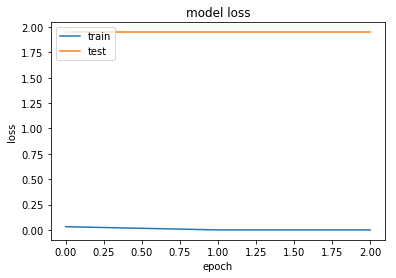

/home/jma/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:32: UserWarning: Update your `predict_generator` call to the Keras 2 API: `predict_generator(<generator..., steps=1000)`


(10000, 1)


array([[  2.55803407e-05],
       [  6.95740152e-03],
       [  9.99922514e-01],
       [  1.99549785e-03],
       [  9.99941349e-01],
       [  3.37037065e-08],
       [  1.21050946e-01],
       [  9.98556077e-01],
       [  9.97494936e-01],
       [  6.19581640e-02]], dtype=float32)

In [6]:
#simply model to test
model = Sequential([
    Dense(32, input_dim=20),
    Activation('relu'),
    Dense(1),
    Activation('sigmoid'),
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy')

tr_gen=batch_generator(X,y,batch_size=10,shuffle=True)
val_gen=batch_generator(X_v,y_v,batch_size=10,shuffle=False)
tst_gen=batch_generator(X_v,batch_size=10, shuffle =False) #same generator but no 'y'


history=model.fit_generator(tr_gen, 
                samples_per_epoch=X.shape[0], 
                nb_epoch=3, 
                verbose=True,
                validation_data=val_gen,
                nb_val_samples=X_v.shape[0])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#predict by calling same generator
pred=model.predict_generator(tst_gen,val_samples=1000)
print (pred.shape)
pred[0:10]

Nice example of OOP based Keras model with callbacks and logging - updated for Keras 2 API


In [25]:
#Early stopping ##############################################################################################
##############################################################################################################


class clsvalidation_metric(Callback):  #inherits from Callback
    
    def __init__(self, filepath, validation_data=(), patience=5):
        super(Callback, self).__init__()

        self.patience = patience
        self.X_val, self.y_val = validation_data  #tuple of validation X and y split out from validation data
        self.best = 0.0
        self.wait = 0  #counter for patience
        self.filepath=filepath

    def on_epoch_end(self, epoch, logs={}):
        p = self.model.predict(self.X_val, verbose=0)
        
        #this can be any metric
        current = ml_metrics.quadratic_weighted_kappa(self.y_val.values.ravel(),np.clip(np.round(p.astype(int).ravel()), 1, 8))
        
        if current > self.best:
            self.best = current
            self.wait = 0
            self.model.save_weights(self.filepath, overwrite=True)
        else:
            if self.wait >= self.patience:
                self.model.stop_training = True
                print('Epoch %d: early stopping' % (epoch))
                print('Retrieving best weights from %s' % (self.filepath))
                self.model.load_weights(self.filepath)
                           
            self.wait += 1 #incremental the number of times without improvement
        print('Epoch %d : %f | Best : %f \n' % (epoch,current,self.best))
        

        
#build out model        
def build_model(input_dim,hidden_nodes,dropout,final_dim, activation,final_activation,optimizer,loss):
    
    input = Input(shape=(input_dim,))
    
    for i in range(len(hidden_nodes)):
        if i ==0:
            x=Dense(units=hidden_nodes[i],activation=activation)(input) #units is the output_dim in keras 2 now 
        else:
            x=Dense(units=hidden_nodes[i],activation=activation)(x)
        
        x=Dropout(rate=dropout[i])(x)
    
    output=Dense(units=final_dim,activation=final_activation)(x)
    
    model=Model(inputs=input, outputs=output)
    model.compile(optimizer=optimizer, loss=loss)
    return model
        
#class instance of a call back 
#pass in the tuple of validation data, patience and filepath for the best model checkpoint
val_call = clsvalidation_metric(validation_data=(X_v, y_v), patience=5, filepath='/home/jma/Desktop/Programming/python_scripts/Kaggle/prudential/keras_models/best.h5') #instantiate object
      

class Keras_model():
    def __init__(self,input_dim,hidden_nodes,dropout,final_dim, activation,final_activation,optimizer,loss):

        #define the model to build
        self.model = build_model(input_dim=input_dim,hidden_nodes=hidden_nodes,dropout=dropout,
                                 final_dim=final_dim, activation=activation,final_activation=final_activation
                                 ,optimizer=optimizer,loss=loss)

        
    #define a fit function
    def fit(self,X,y,batch_size=128,nb_epoch=10,shuffle=True,verbose=1,validation_data=None):
        self.model.fit(X,y,batch_size=batch_size,epochs=nb_epoch,shuffle=shuffle,verbose=verbose,validation_data=None,callbacks=None)

        
        
    #define a fit generator function
    def fit_generator(self,X,y,batch_size=128,nb_epoch=10,shuffle=True,verbose=1,validation_data=None,callbacks=None):
        tr_gen=batch_generator(X,y,batch_size=batch_size,shuffle=shuffle)


        if validation_data:
            X_test,y_test = validation_data
            val_gen=batch_generator(X_v,y_v,batch_size=batch,shuffle=False)
            nb_val_samples = X_test[-1].shape[0]
        else:
            te_gen = None
            nb_val_samples = None

        self.model.fit_generator(
                tr_gen, 
                samples_per_epoch=X[-1].shape[0], 
                epochs=nb_epoch, 
                verbose=verbose, 
                callbacks=callbacks, 
                validation_data=te_gen, 
                nb_val_samples=nb_val_samples, 
                max_q_size=10
                )
    
    def predict(self,X,batch_size=128):
        y_preds = predict_batch(self.model,X,batch_size=batch_size)
        return y_preds

In [26]:
mod_2=Keras_model(input_dim=20,hidden_nodes=[30,15],dropout=[0.5,0.5],final_dim=1, activation='relu',
              final_activation='sigmoid',optimizer='adam',loss='binary_crossentropy')

mod_2.fit(X=X,y=y,batch_size=128,nb_epoch=100,shuffle=True,verbose=1,validation_data=None)


Epoch 1/100
1000/1000 [==============================] - 0s - loss: 0.7762     
Epoch 2/100
1000/1000 [==============================] - 0s - loss: 0.7521     
Epoch 3/100
1000/1000 [==============================] - 0s - loss: 0.7252     
Epoch 4/100
1000/1000 [==============================] - 0s - loss: 0.7206     
Epoch 5/100
1000/1000 [==============================] - 0s - loss: 0.7029     
Epoch 6/100
1000/1000 [==============================] - 0s - loss: 0.6915     
Epoch 7/100
1000/1000 [==============================] - 0s - loss: 0.6626     